## Import Libraries

In [148]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn as sk
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import string as str
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

## Load Data

In [149]:
train_df=pd.read_csv('data/train.csv')
test_df=pd.read_csv('data/test.csv')

## EDA

In [150]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [151]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [152]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [153]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Visualize Distributions

<Axes: xlabel='Survived', ylabel='count'>

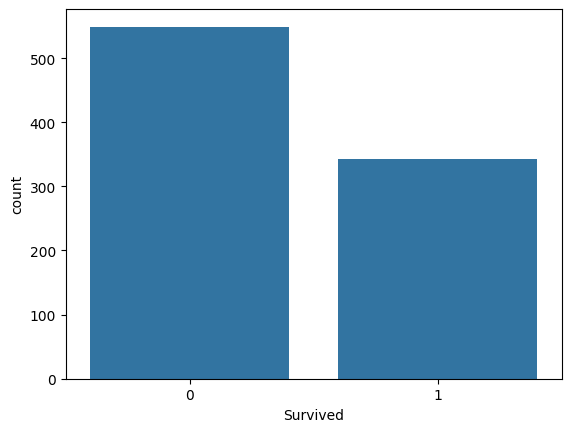

In [154]:
sns.countplot(x='Survived', data=train_df)

<Axes: xlabel='Sex', ylabel='count'>

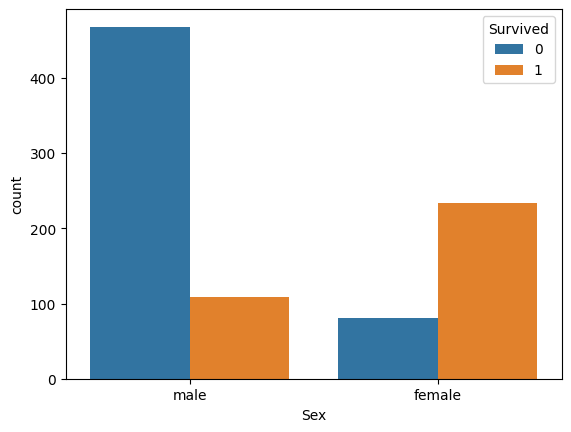

In [155]:
sns.countplot(x='Sex', hue='Survived', data=train_df)


<Axes: xlabel='Pclass', ylabel='count'>

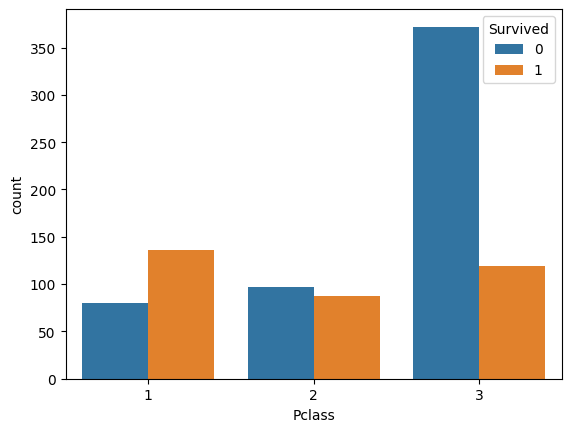

In [156]:
sns.countplot(x='Pclass', hue='Survived', data=train_df)

<Axes: xlabel='Age', ylabel='Count'>

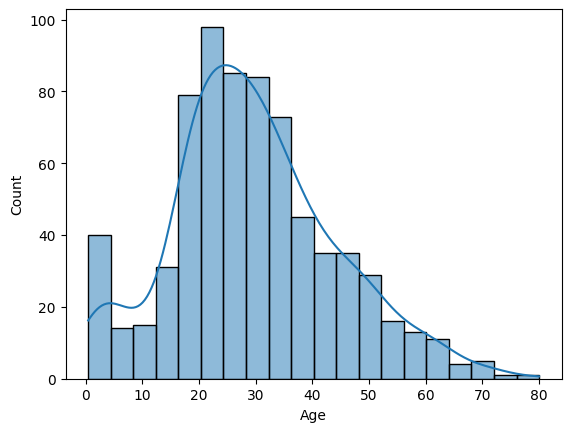

In [157]:
sns.histplot(train_df['Age'].dropna(), kde=True)

<Axes: xlabel='Pclass', ylabel='Age'>

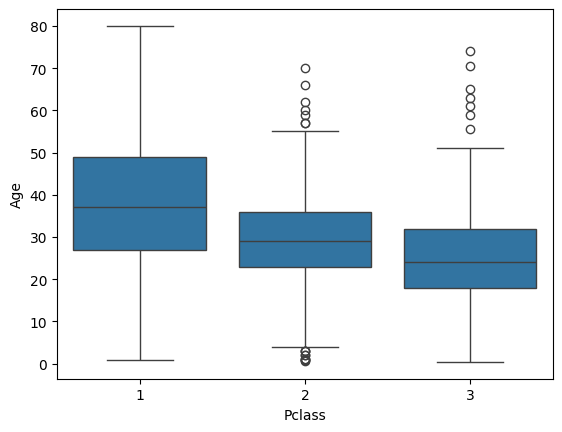

In [158]:
sns.boxplot(x='Pclass', y='Age', data=train_df)


## Data Preprocessing

### Hanle missing values

In [159]:
train_df['Age'].fillna(train_df['Age'].mean(), inplace=True)
test_df['Age'].fillna(test_df['Age'].mean(), inplace=True)

C:\Users\Souad Khalifeh\AppData\Local\Temp\ipykernel_24916\3764405876.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].mean(), inplace=True)
C:\Users\Souad Khalifeh\AppData\Local\Temp\ipykernel_24916\3764405876.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

In [160]:
train_df.drop(['PassengerId', 'Ticket', 'Cabin'], axis=1, inplace=True)
test_df.drop(['Ticket', 'Cabin'], axis=1, inplace=True)

### Label Encoding

In [161]:
le= LabelEncoder()
train_df['Sex'] = le.fit_transform(train_df['Sex'])
test_df['Sex']=le.transform(test_df['Sex'])

In [162]:
train_df = pd.get_dummies(train_df, columns=['Embarked'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['Embarked'], drop_first=True)

### Feature Engineering

In [163]:
train_df['Name'][0]

'Braund, Mr. Owen Harris'

In [164]:
train_df['Title']=train_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test_df['Title']=test_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

for df in [train_df, test_df]:
    df['Title'] = df['Title'].replace(
        ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare'
    )
    df['Title'] = df['Title'].replace(['Mlle', 'Ms'], 'Miss')
    df['Title'] = df['Title'].replace('Mme', 'Mrs')

    
train_df['Title'] = le.fit_transform(train_df['Title'])
test_df['Title'] = le.transform(test_df['Title'])    

<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
C:\Users\Souad Khalifeh\AppData\Local\Temp\ipykernel_24916\27420677.py:1: SyntaxWarning: invalid escape sequence '\.'
  train_df['Title']=train_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
C:\Users\Souad Khalifeh\AppData\Local\Temp\ipykernel_24916\27420677.py:2: SyntaxWarning: invalid escape sequence '\.'
  test_df['Title']=test_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


In [165]:
train_df.drop('Name', axis=1, inplace=True)
test_df.drop('Name', axis=1, inplace=True)


## Build Model

In [166]:
X = train_df.drop('Survived', axis=1)
y = train_df['Survived']

In [167]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

### Logistic Regression

In [168]:
lr=LogisticRegression()
lr.fit(X_train, y_train)


c:\Users\Souad Khalifeh\Desktop\Predicting_Titanic_Survivors_Project\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


### Random Forest

In [169]:
rf= RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### XGBoost

In [170]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)


c:\Users\Souad Khalifeh\Desktop\Predicting_Titanic_Survivors_Project\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:16:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


## Evaluation

In [171]:
y_pred_lr=lr.predict(X_val)
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_lr))
print("Classification Report:\n", classification_report(y_val, y_pred_lr))

Confusion Matrix:
 [[91 14]
 [21 53]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.87      0.84       105
           1       0.79      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



In [172]:
y_pred_rf=rf.predict(X_val) 
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_rf))
print("Classification Report:\n", classification_report(y_val, y_pred_rf))

Confusion Matrix:
 [[91 14]
 [16 58]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86       105
           1       0.81      0.78      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.83      0.83      0.83       179



In [173]:
y_pred_xg=xgb.predict(X_val)
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_xg))
print("Classification Report:\n", classification_report(y_val, y_pred_xg))

Confusion Matrix:
 [[93 12]
 [15 59]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.89      0.87       105
           1       0.83      0.80      0.81        74

    accuracy                           0.85       179
   macro avg       0.85      0.84      0.84       179
weighted avg       0.85      0.85      0.85       179



## Hyperparameter tuning 

In [174]:
params={
    'n_estimators': [100, 200],
    'max_depth': [4,6,8],
}
grid = GridSearchCV(RandomForestClassifier(), params, cv=5)
grid.fit(X, y)
print(grid.best_params_)

{'max_depth': 8, 'n_estimators': 200}
